In [1]:
# header stuff
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 150

# AST 4723

## Radio Telescopes

# Logistics

The radio labs are big.  I've split them into many separate assignments, though most of the grade will come from the formal writeup.

Lab 1 is Site Characterization: find a place to put your telescope.

Lab 2 is the Radio Telescope lab: take data.  You should have read the lab by now through S1.5.  The remainder will be due soon.

These will overlap in time: you have to do part of Lab 1 (figure out where you're going to put the telescope) before you can do parts of Lab 2 (put the telescope there).  

# Logistics

You will need to check out equipment for this lab.  Coordinate with me & Jared.  There are 12 telescopes, but only ~4-6 functioning computers.


You will need to complete one or both of the Site Characterization lab assignments:
 * [Home Site Characterization](https://ufl.instructure.com/courses/404100/assignments/4407814)
 * [Bryant Space Center Characterization](https://ufl.instructure.com/courses/404100/assignments/4414843)
 
before you can check out a telesecope.



Our radio telescope will consist of a parabolic reflector, a secondary reflector / shield, and a dipole feed.

<img src="images/IMG_20200806_140651.jpg" style='max-height:500px; margin:auto'>

## Parabolic Reflector

The reflector is very similar to an optical element you'd use in optical astronomy: it brings light to a focus

<img src="images/parabolic_antenna.png" style="max-height: 400px; background-color:white; margin:auto;">

## Feed

However, what we put at the focus is very different

<img src='images/dipole_feed.png' style='max-width: 450px; float: left;'> <div style="float:center; text-align:center; margin:auto;">vs</div> <img src="https://upload.wikimedia.org/wikipedia/commons/5/5b/CCD_SONY_ICX493AQA_sensor_side.jpg" style='max-width: 450px; float: right;'>

## Parabolic Reflector

And the reflector itself is very different:


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/CSIRO_ScienceImage_4350_CSIROs_Parkes_Radio_Telescope_with_moon_in_the_background.jpg/500px-CSIRO_ScienceImage_4350_CSIROs_Parkes_Radio_Telescope_with_moon_in_the_background.jpg" style="max-width:450px; float:left; margin: auto;"> <div style="text-align:center;">vs</div> <img src="https://2.bp.blogspot.com/-5Qe0IHq_QMA/WNkJZsJpkUI/AAAAAAAABGI/8XY9UDOraXor8Gn3bStAxyklQZQqoZPCgCLcB/s1600/GTC%2Bmirror.jpg" style="max-width:450px; float:right; margin:auto;">

##  Radio Wavelengths

The differences come from looking at different wavelengths.  Radio and optical wavelengths are the two bands of light that make it to Earth's surface.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Atmospheric_electromagnetic_transmittance_or_opacity.jpg/1024px-Atmospheric_electromagnetic_transmittance_or_opacity.jpg" style='margin:auto'>

## Mesh surfaces are reflective

Conductive meshes will reflect electromagnetic waves larger than the separation between mesh elements.

The separation needs to be smaller than $\sim\lambda/10$.

Our reflectors have a separation of about 2cm between conductive elements, so they are reflective to wavelengths 20cm and longer.

## Radio Wavelength Light

In radio astronomy, and radio communication, we operate in the _wave limit_ of light, instead of the _particle limit_ in the optical.

This is partly because of the _number of photons_ involved in detection


## Radio vs Optical

Let's consider a typical star measurement in optical astronomy.  Say we receive 1000 photons from a star at V-band.  How much energy is that?

Recall that $E=\frac{hc}{\lambda}$

In [2]:
from astropy import units as u, constants
optical_wavelength = 500*u.nm
energy_per_optical_photon = constants.h * constants.c / optical_wavelength
n_photons = 1000
print(f"Energy per photon: {energy_per_optical_photon.to(u.eV):0.2f}, "
      f"total energy: {(energy_per_optical_photon*n_photons).to(u.erg):0.3g}")

Energy per photon: 2.48 eV, total energy: 3.97e-09 erg


## Radio vs Optical

How much energy does a radio photon contain? 

In [3]:
radio_wavelength = 20*u.cm
energy_per_radio_photon = constants.h * constants.c / radio_wavelength
print(f"Energy per photon: {energy_per_radio_photon.to(u.eV):0.2g}")

Energy per photon: 6.2e-06 eV


## Radio vs Optical

If we want to receive the same amount of energy in the radio as we did from that star, how many photons do we need?

In [4]:
print(f"{(energy_per_optical_photon / energy_per_radio_photon).decompose():0.2g}")

4e+05


That's 400,000 20cm photons per optical photon, or 400,000,000 photons for that star.  (In practice, though, stars are intrinsically much fainter in the radio.)

Because of these large numbers of photons, it's more convenient to treat radio waves as continuous rather than discrete.

## Radio vs Optical

We will also treat radio waves as waves because we can measure both the _phase_ and _amplitude_ of the waves independently, which is what allows us to do _aperture synthesis_.  

That's the topic of another lecture, though....

## Radio vs Optical: Day and Night

You can listen to the radio day or night, and it doesn't sound much different.

In general, the sky does not change brightness at radio wavelengths from day to night.  The sun is brighter than anything else in the sky, but unlike in the optical where the sky is blue...

REVIEW QUESTION: What makes the sky blue?


REVIEW QUESTION: What is the wavelength dependence of that phenomenon?

## Radio vs Optical: Day and Night

You can listen to your car radio day or night, and it doesn't sound much different.

In general, the sky does not change brightness at radio wavelengths from day to night.  The sun is brighter than anything else in the sky, but unlike in the optical where the sky is blue because of Rayleigh scattering, the particles in the air do not efficiently scatter radio waves.  The radio sky is dark day or night.

## Radio vs Optical: Day and Night

The dark sky is somewhat counter-balanced by the "light pollution" we feed into it.

Human-produced radio signals are known to astronomers as Radio Frequency Interference, RFI.

## RFI

<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/KBRC_antenna_tower_guy_wires.JPG" style='max-height:650px; margin:auto'>

## The reflecting antenna

Returning to our antenna: it has a diameter of about 1.5m.  If we observe at 20 cm, what is the _diffraction limit_ of our telescope?

(question for students)

In [5]:
diameter = 1.5*u.m
airy_width = 1.22 * radio_wavelength / diameter
print(f"Airy width (distance to first null): {airy_width.to(u.degree, u.dimensionless_angles()):0.3f}")

Airy width (distance to first null): 9.320 deg


## The reflecting antenna

Our antenna has a HUGE airy pattern!  

Even operating in the diffraction limit (we are, there's no "seeing" in the radio since the atmosphere has little effect on radio waves), our resolution will be pretty poor.

Also, we can no longer approximate our PSF as a Gaussian.  It is an Airy pattern with sidelobes.

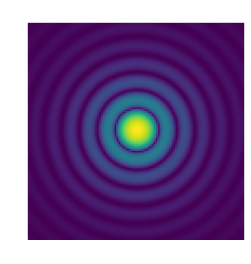

In [6]:
from astropy.modeling.models import AiryDisk2D
from astropy.visualization import simple_norm
airy = AiryDisk2D()
y,x = np.mgrid[-5:5:0.1,-5:5:0.1]
img = airy(x,y)
pl.imshow(img, norm=simple_norm(img, stretch='log'), origin='lower');
pl.title("An Airy disk");

## Sidelobes

Sidelobes are the extra rings in the Airy pattern.  They are much lower than the main peak, but they're not zero.

If a very bright thing - like the sun, or a broadcasting radio antenna - lands in a sidelobe, it will dominate over the main lobe.

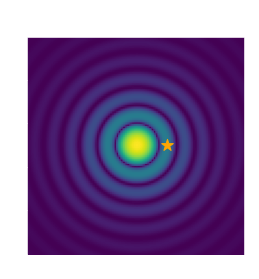

In [7]:
airy = AiryDisk2D()
pl.imshow(img, norm=simple_norm(img, stretch='log'), origin='lower');
pl.scatter(64, 50, marker='*', color='orange', s=150)
pl.title("An Airy disk with a star in the sidelobe\n(we'll see this as bright signal)");

## Sidelobes

If a very bright thing - like the sun, or a broadcasting radio antenna - lands in a _null_, it will disappear.

This is the principle behind nulling interferometry and coronagraphs.

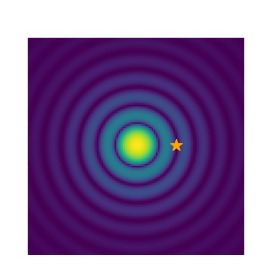

In [8]:
airy = AiryDisk2D()
pl.imshow(img, norm=simple_norm(img, stretch='log'), origin='lower');
pl.scatter(68, 50, marker='*', color='orange', s=150)
pl.title("An Airy disk with a star in the sidelobe\n(we won't see this star at all)");

## Sidelobes

The Airy pattern shows the sidelobes for a simple aperture.  

Real radio telescopes are different.  

They have a different kind of sidelobe pickup from the feed (coming soon).

They are also usually under-illuminated so that the beam is effectively Gaussian.

## Sidelobes

If your sidelobe hits the ground (which can happen - remember our Airy pattern has its first minimum at almost 10 degrees, so if you point at 15 degrees elevation, your sidelobe is on the ground!), the Earth's intrinsic brightness (about 300K) will add noise to your observation.

## Radio Detector: Dipole antenna feed

What do we focus onto?

Instead of a detector, we focus onto a dipole antenna feed. 


## Dipole Antenna
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Dipole_receiving_antenna_animation_6_800x394x150ms.gif/660px-Dipole_receiving_antenna_animation_6_800x394x150ms.gif' style='max-height: 500px; margin:auto'>

## Dipole antenna

The oscillating radio waves produce a small current.

If the wavelength is double the length of the antenna, the current flowing back and forth will be resonant with the driving electromagnetic wave.

## Resonance

Resonant standing waves produce the strongest signal.  

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Standing_waves_on_a_string.gif" style="max-height:400px">

Multiple different wavelengths all produce standing waves, though.

## Dipole Antenna

Our detector is a simple piece of conductive material.

Problem: this simple piece of metal picks up _everything_ - you can listen to the radio from one of these antennae.

Dipole antennae have a different "beam pattern" (resolution) than a dish: they basically see everything around them.  

This toroid shows the response pattern (the "PSF") of a dipole antenna.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e1/L-over2-rad-pat-per.jpg" style='margin: auto'>

## Dipole Feed

We added "shielding" to block out the waves that aren't coming from the reflector.

<img src="images/shielding.jpg" style='max-height:400px; margin:auto'>

# The radio telescope

<img src="images/RadioTelescope.jpeg" style="margin:auto">

## The Signal Path

What do we do with that standing wave?

We send it down a conductive _transmission line_ to the next thing on our _signal path_

<img src="images/feedline.jpg" style='margin:auto;'>

## The Signal Path

The next item we hit is the LNA, Low Noise Amplifier.  But we're going to skip that and come back... technically it isn't needed in all cases.

## The Software-Defined Radio

<img src="images/SDRBlogimage.jpg" style="margin:auto">

To understand the SDR, we'll look at this "Block Diagram"

<img src="https://www.rtl-sdr.com/wp-content/uploads/2018/03/rtl_sdr_behavioural_model.png" style="margin:auto">

We start from the antenna, go into a "variable-gain low-noise amplifier", 
then into a mixer, then a low-pass filter, then an Analog-to-Digital Converter, then the computer.

<img src="https://www.rtl-sdr.com/wp-content/uploads/2018/03/rtl_sdr_behavioural_model.png" style="margin:auto">

We'll go through these from the computer to the antenna.

## ADC: Analog-to-Digital Converter

The ADC samples the input data stream at a constant rate, turning analog (smooth) signal into numbers that the computer can record.

The sample rate is tunable from 0.5 to 2.5 MHz, i.e., 500,000 to 2.5 million samples (measurements) per second.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Conversion_AD_DA.png/330px-Conversion_AD_DA.png" style='max-height: 400px; margin:auto;'>



## ADC

The ADC operates at 0.5 to 2.5 MHz, but our target signal (i.e., the frequency of the electromagnetic wave we want to measure) is almost never in that range!  

The ionosphere blocks out signals at <10 MHz: we can't see anything from space at frequencies lower than this (and practically, <30 MHz is pretty sketchy).

How do we get signals we can measure?

## The Heterodyne Mixer

Heterodyning means "mixing signals". 



$\sin \theta_1 \sin \theta_2 = \frac{1}{2}\cos(\theta_1 - \theta_2) - \frac{1}{2}\cos(\theta_1 + \theta_2)$

By multiplying frequencies at two different signals, we obtain two _new_ signals at different frequencies.



In electrical diagrams, it is shown by this:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/IdealMixer.svg/525px-IdealMixer.svg.png" style='background-color: white; margin:auto'>

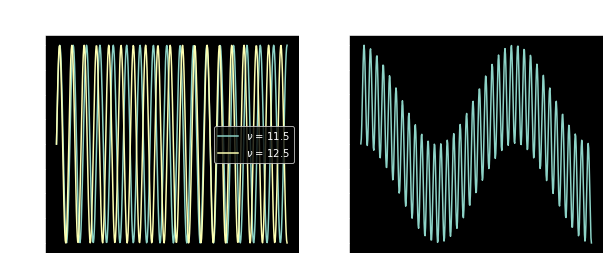

In [9]:
freq1, freq2 = 11.5, 12.5
theta = np.linspace(0, 3*np.pi, 500)
pl.figure(figsize=(10,4))
pl.subplot(1,2,1)
pl.plot(np.sin(theta * freq1), label=f'$\\nu$ = {freq1}')
pl.plot(np.sin(theta * freq2), label=f'$\\nu$ = {freq2}')
pl.legend(loc='best'); pl.title(r"sin$\theta_1$ and sin$\theta_2$")
pl.subplot(1,2,2)
pl.plot(np.sin(theta * freq1) * np.sin(theta * freq2));
pl.title(r"sin$\theta_1$ * sin$\theta_2$")
pl.suptitle("Example: Mixing two frequencies");

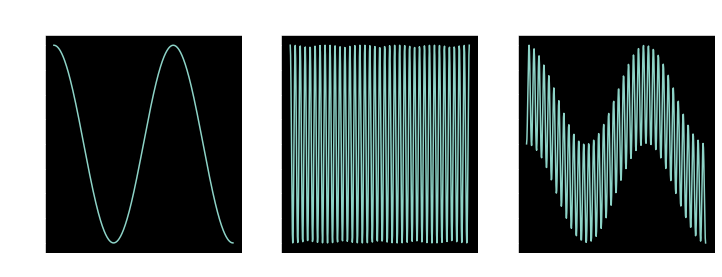

In [10]:
pl.figure(figsize=(12,4))
pl.subplot(1,3,1)
pl.plot(np.cos(theta * (freq1 - freq2))); pl.title(r'cos$(\theta_1-\theta_2)$')
pl.subplot(1,3,2)
pl.plot(np.cos(theta * (freq1 + freq2))); pl.title(r'cos$(\theta_1+\theta_2)$')
pl.subplot(1,3,3)
pl.plot(np.cos(theta * (freq1 - freq2)) - np.cos(theta * (freq1+freq2))); pl.title(r'cos$(\theta_1-\theta_2)$ - cos$(\theta_1+\theta_2)$');
pl.suptitle("Breaking the signals apart");

## The Heterodyne mixer: Choosing your target signal

If you have a _target frequency_ and you can control the second signal frequency (the *local oscillator*), you can control the frequency that comes out!



Example: you want to measure a 1.421 GHz signal with our 0.5 MHz ADC.  We then want either $\nu_1 - \nu_2 = 0.5$ MHz or $\nu_2 - \nu_1 = 0.5$ MHz.

$\nu_1 = 1.421$ GHz, so $\nu_2$ must be either 1.4215 or 1.4205 GHz.

# The Low-Pass Filter

"Low-pass filter" means the low-frequency goes through and the high-frequency is blocked out.

If we picked $\nu_2 = 1.4205$ GHz, the two frequencies coming out of the mixer would be $\nu_1 - \nu_2 = 0.5$ MHz and $\nu_1+\nu_2 = 2.8415$ GHz.

The low-pass filter will block this high-frequency signal, which would otherwise add noise.

<img src="https://www.rtl-sdr.com/wp-content/uploads/2018/03/rtl_sdr_behavioural_model.png" style='margin:auto'>

## Frequency Synthesis

Frequency synthesis uses an oscillator (a device that produces electromagnetic signal at a fixed, known frequency), for our purposes a *crystal oscillator*, in conjunction with a *phase-locked loop* to produce a signal at a desired frequency.

In short, it's an electrically-tunable frequency selection device.  

A _phase-locked loop_ is needed to keep the oscillator from drifting.  Generally, tunable oscillators don't stay at the same frequency unless they're forced to.

The PLL detects changes in the oscillator frequency and corrects them by changing the voltage to keep the frequency fixed.

## Low-noise amplifier

The last element to discuss is the low-noise amplifier (LNA). 

In brief, it's something that takes the input signal, which might have a relatively low voltage (and be hard to measure as a result) and scale it up by a factor of many.   It is important that this step not add any noise (low-noise), since that would obscure the signal.

<img src="https://www.rtl-sdr.com/wp-content/uploads/2018/03/rtl_sdr_behavioural_model.png" style="margin:auto">

## Low-Noise Amplifier

An LNA takes the input signal and makes it stronger.  It changes the *amplitude* but leaves the *frequency* unchanged.

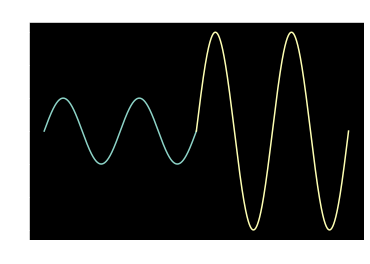

In [11]:
theta = np.linspace(0, 4*np.pi, 1000)
insignal = np.sin(theta)
outsignal = np.sin(theta)*3
pl.plot(theta, insignal)
pl.plot(theta+theta.max(), outsignal);
pl.title("Amplified signal");

## The Signal

The USB dongle delivers an amplified, frequency-shifted, filtered, digitized signal to the computer.

We take that signal and convert it to a spectrum.

## The Signal

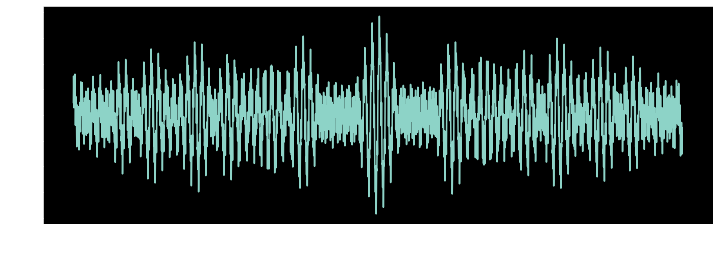

In [12]:
frequencies = [3, 3.3, 3.333333, 3.56, 3.7, 4, 21, 35]
theta = np.linspace(-12, 12, 8192)
signals = [np.sin(2*np.pi*theta * freq) for freq in frequencies]
total_signal = np.sum(signals, axis=0)
pl.figure(figsize=(12,4))
pl.plot(theta, total_signal);
pl.xlabel("Time");
pl.ylabel("Amplitude");

## The Signal

The signal comes in as a _time series_ of amplitude measurements - we measure how strong the electrical signal is as a function of time.  

But we _want_ to measure the power or intensity as a function of frequency.

We do this with Fourier analysis

## From time-sampled signal to the spectrum

In [13]:
ft_signal = np.fft.fft(total_signal)
freq = np.fft.fftfreq(total_signal.size) * total_signal.size / (theta.max()-theta.min())
powerspectrum = np.abs((ft_signal)**2)

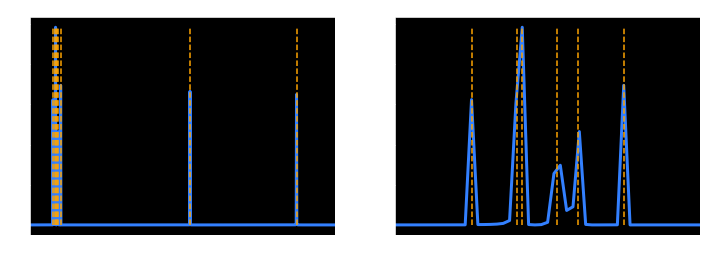

In [14]:
fig = pl.figure(figsize=(12,4))
ax1 = pl.subplot(1,2,1)
ax1.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax1.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
ax1.set_xlim(0,40)
ax2 = pl.subplot(1,2,2)
ax2.plot(freq[freq>0], powerspectrum[freq>0], color=(0.2,0.5,1), linewidth=3)
ax2.vlines(frequencies, 0, powerspectrum.max(), linestyle='--', color='orange')
ax2.set_xlim(2.5,4.5);

FIN (for now)